<a href="https://colab.research.google.com/github/monica-2213/yolov8watch/blob/main/YOLOv8_Watch_Dataset_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 38.8 MB/s eta 0:00:00


In [2]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu121


In [3]:
import torch
print(torch.cuda.is_available())

True


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
# Pip install method (recommended)

!pip install ultralytics==8.1.42

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/Data_1_Uniform_Background

/content/drive/MyDrive/Data_1_Uniform_Background


In [9]:
!ls

classes.txt  data.yaml	test  train  val


In [10]:
#training command
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=100 imgsz=640 batch=16 device=0 plots=True

100% 21.5M/21.5M [00:00<00:00, 37.6MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load

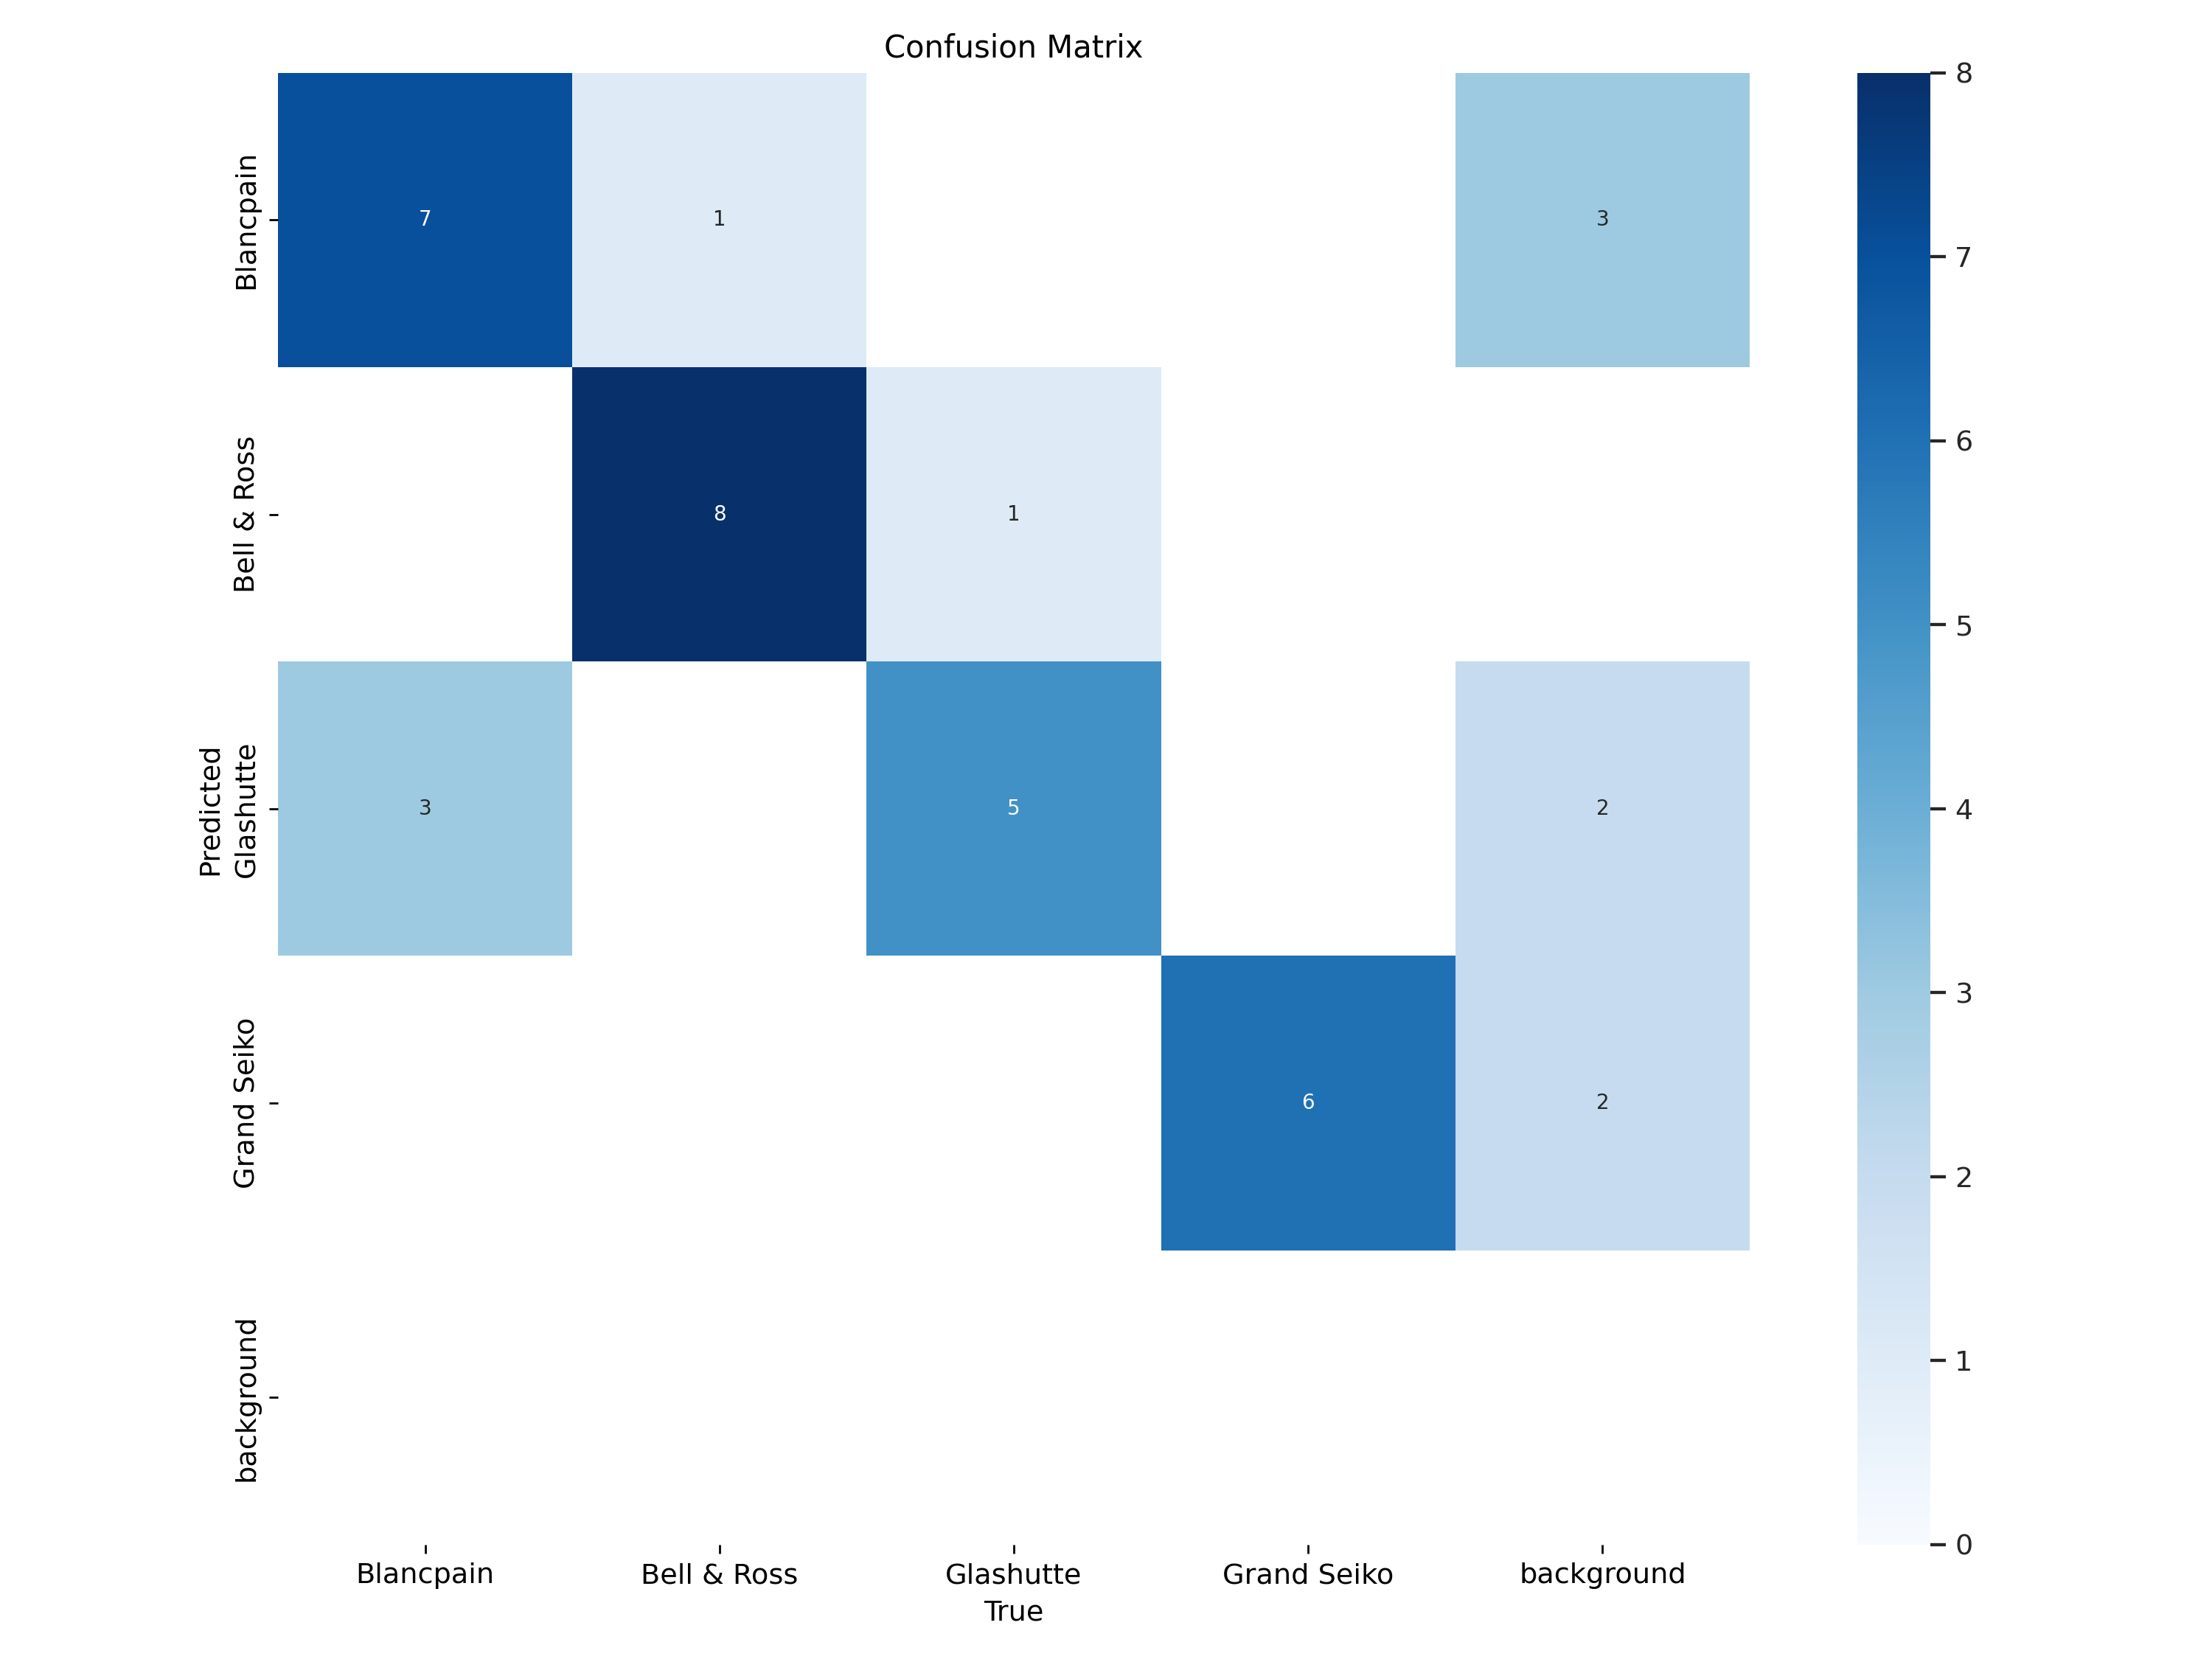

In [11]:
Image(filename='runs/detect/train/confusion_matrix.png', width=640)

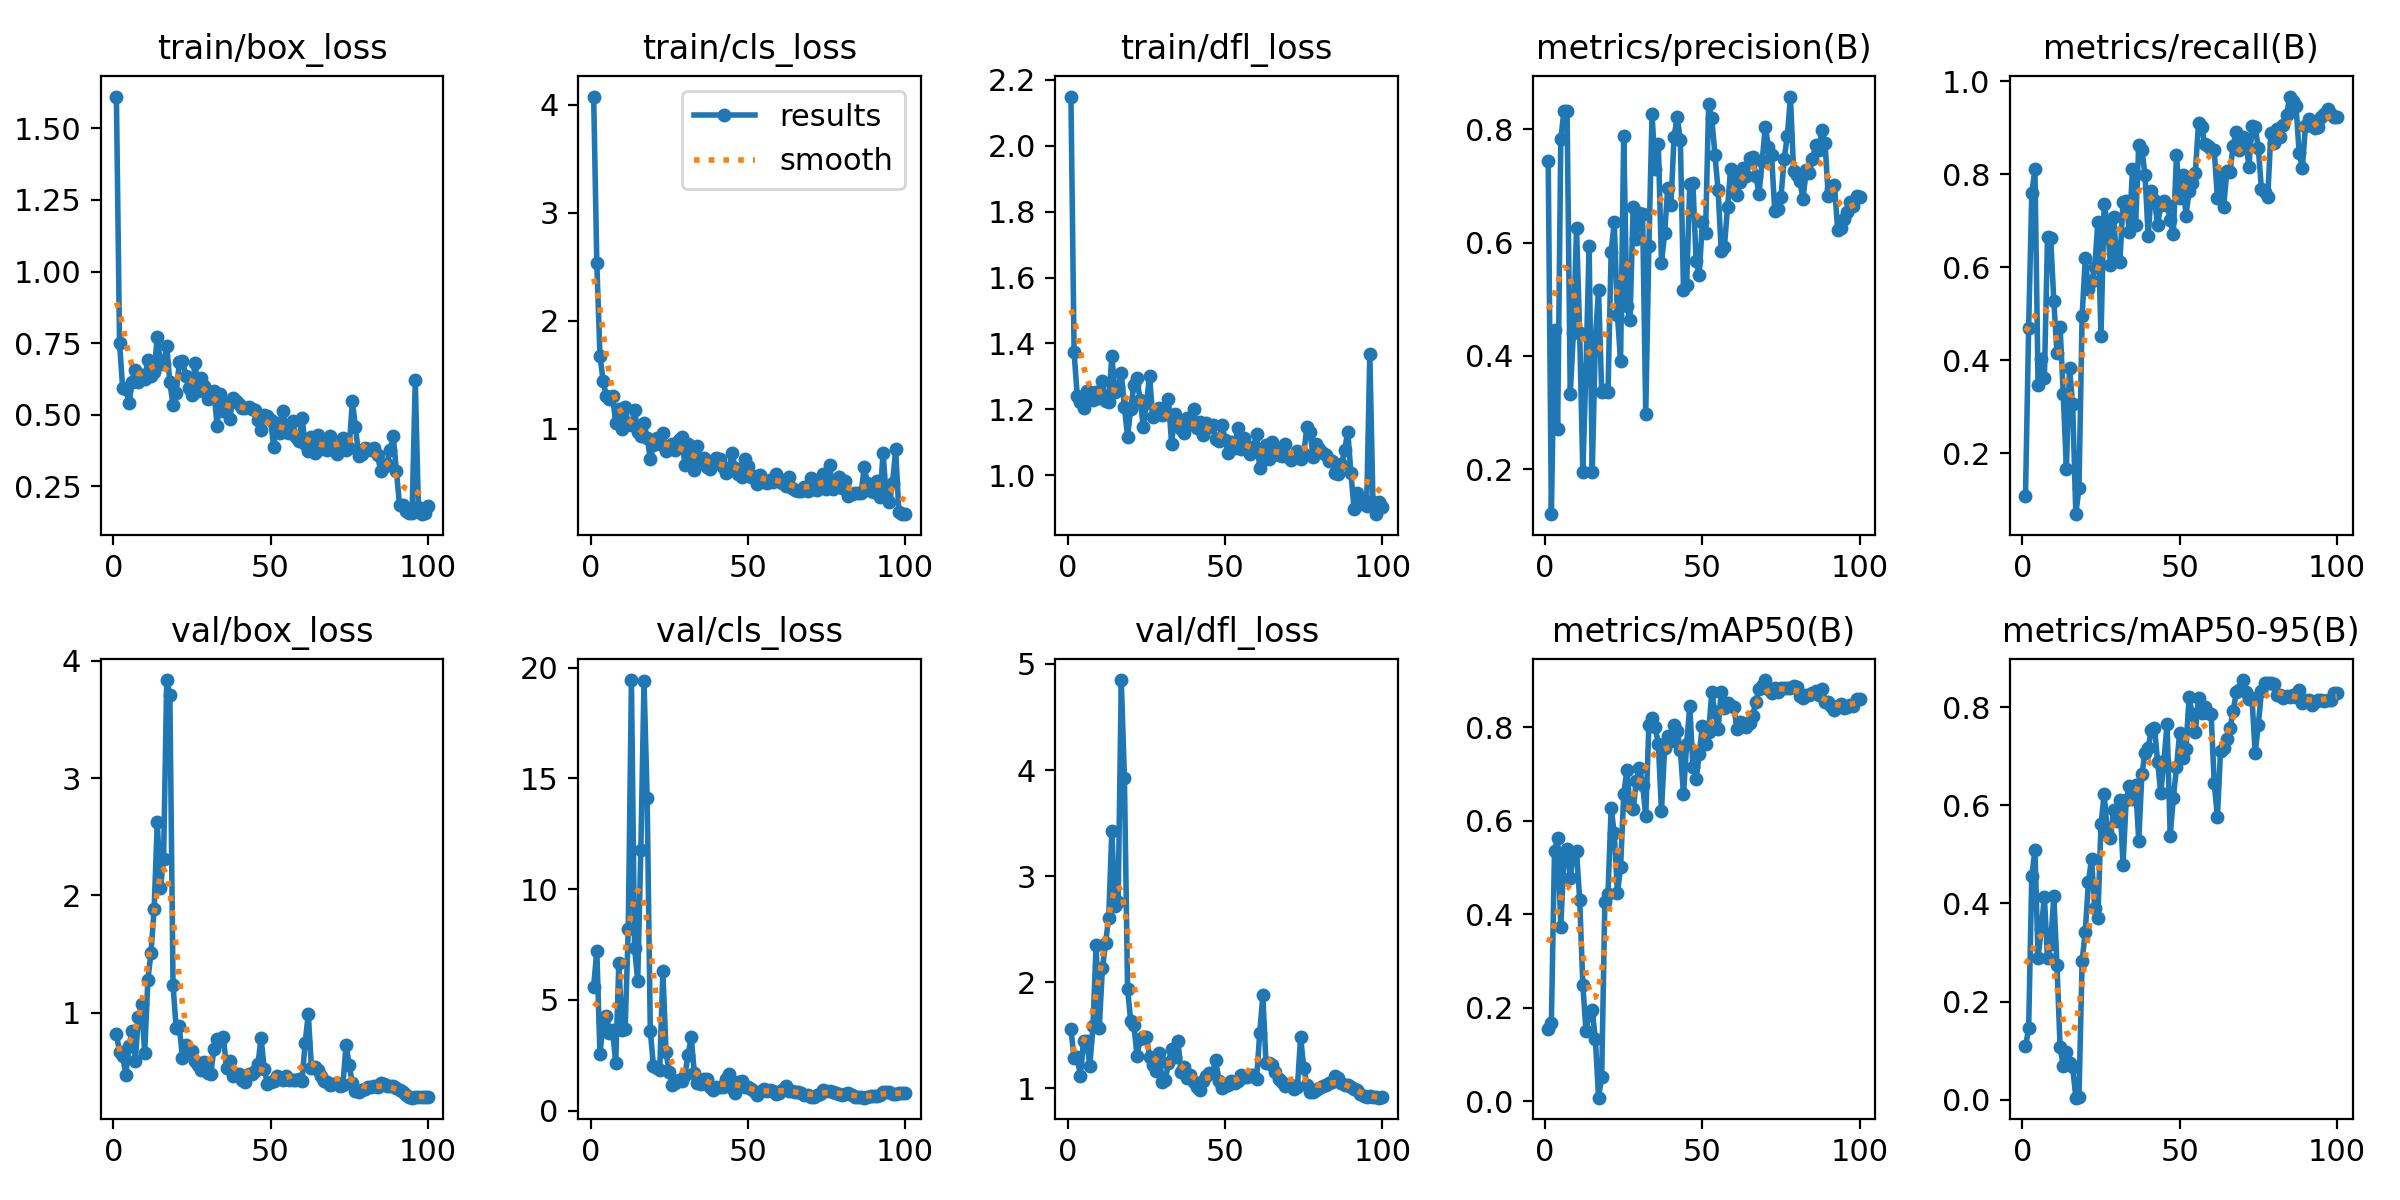

In [12]:
Image(filename='runs/detect/train/results.png', width=600)

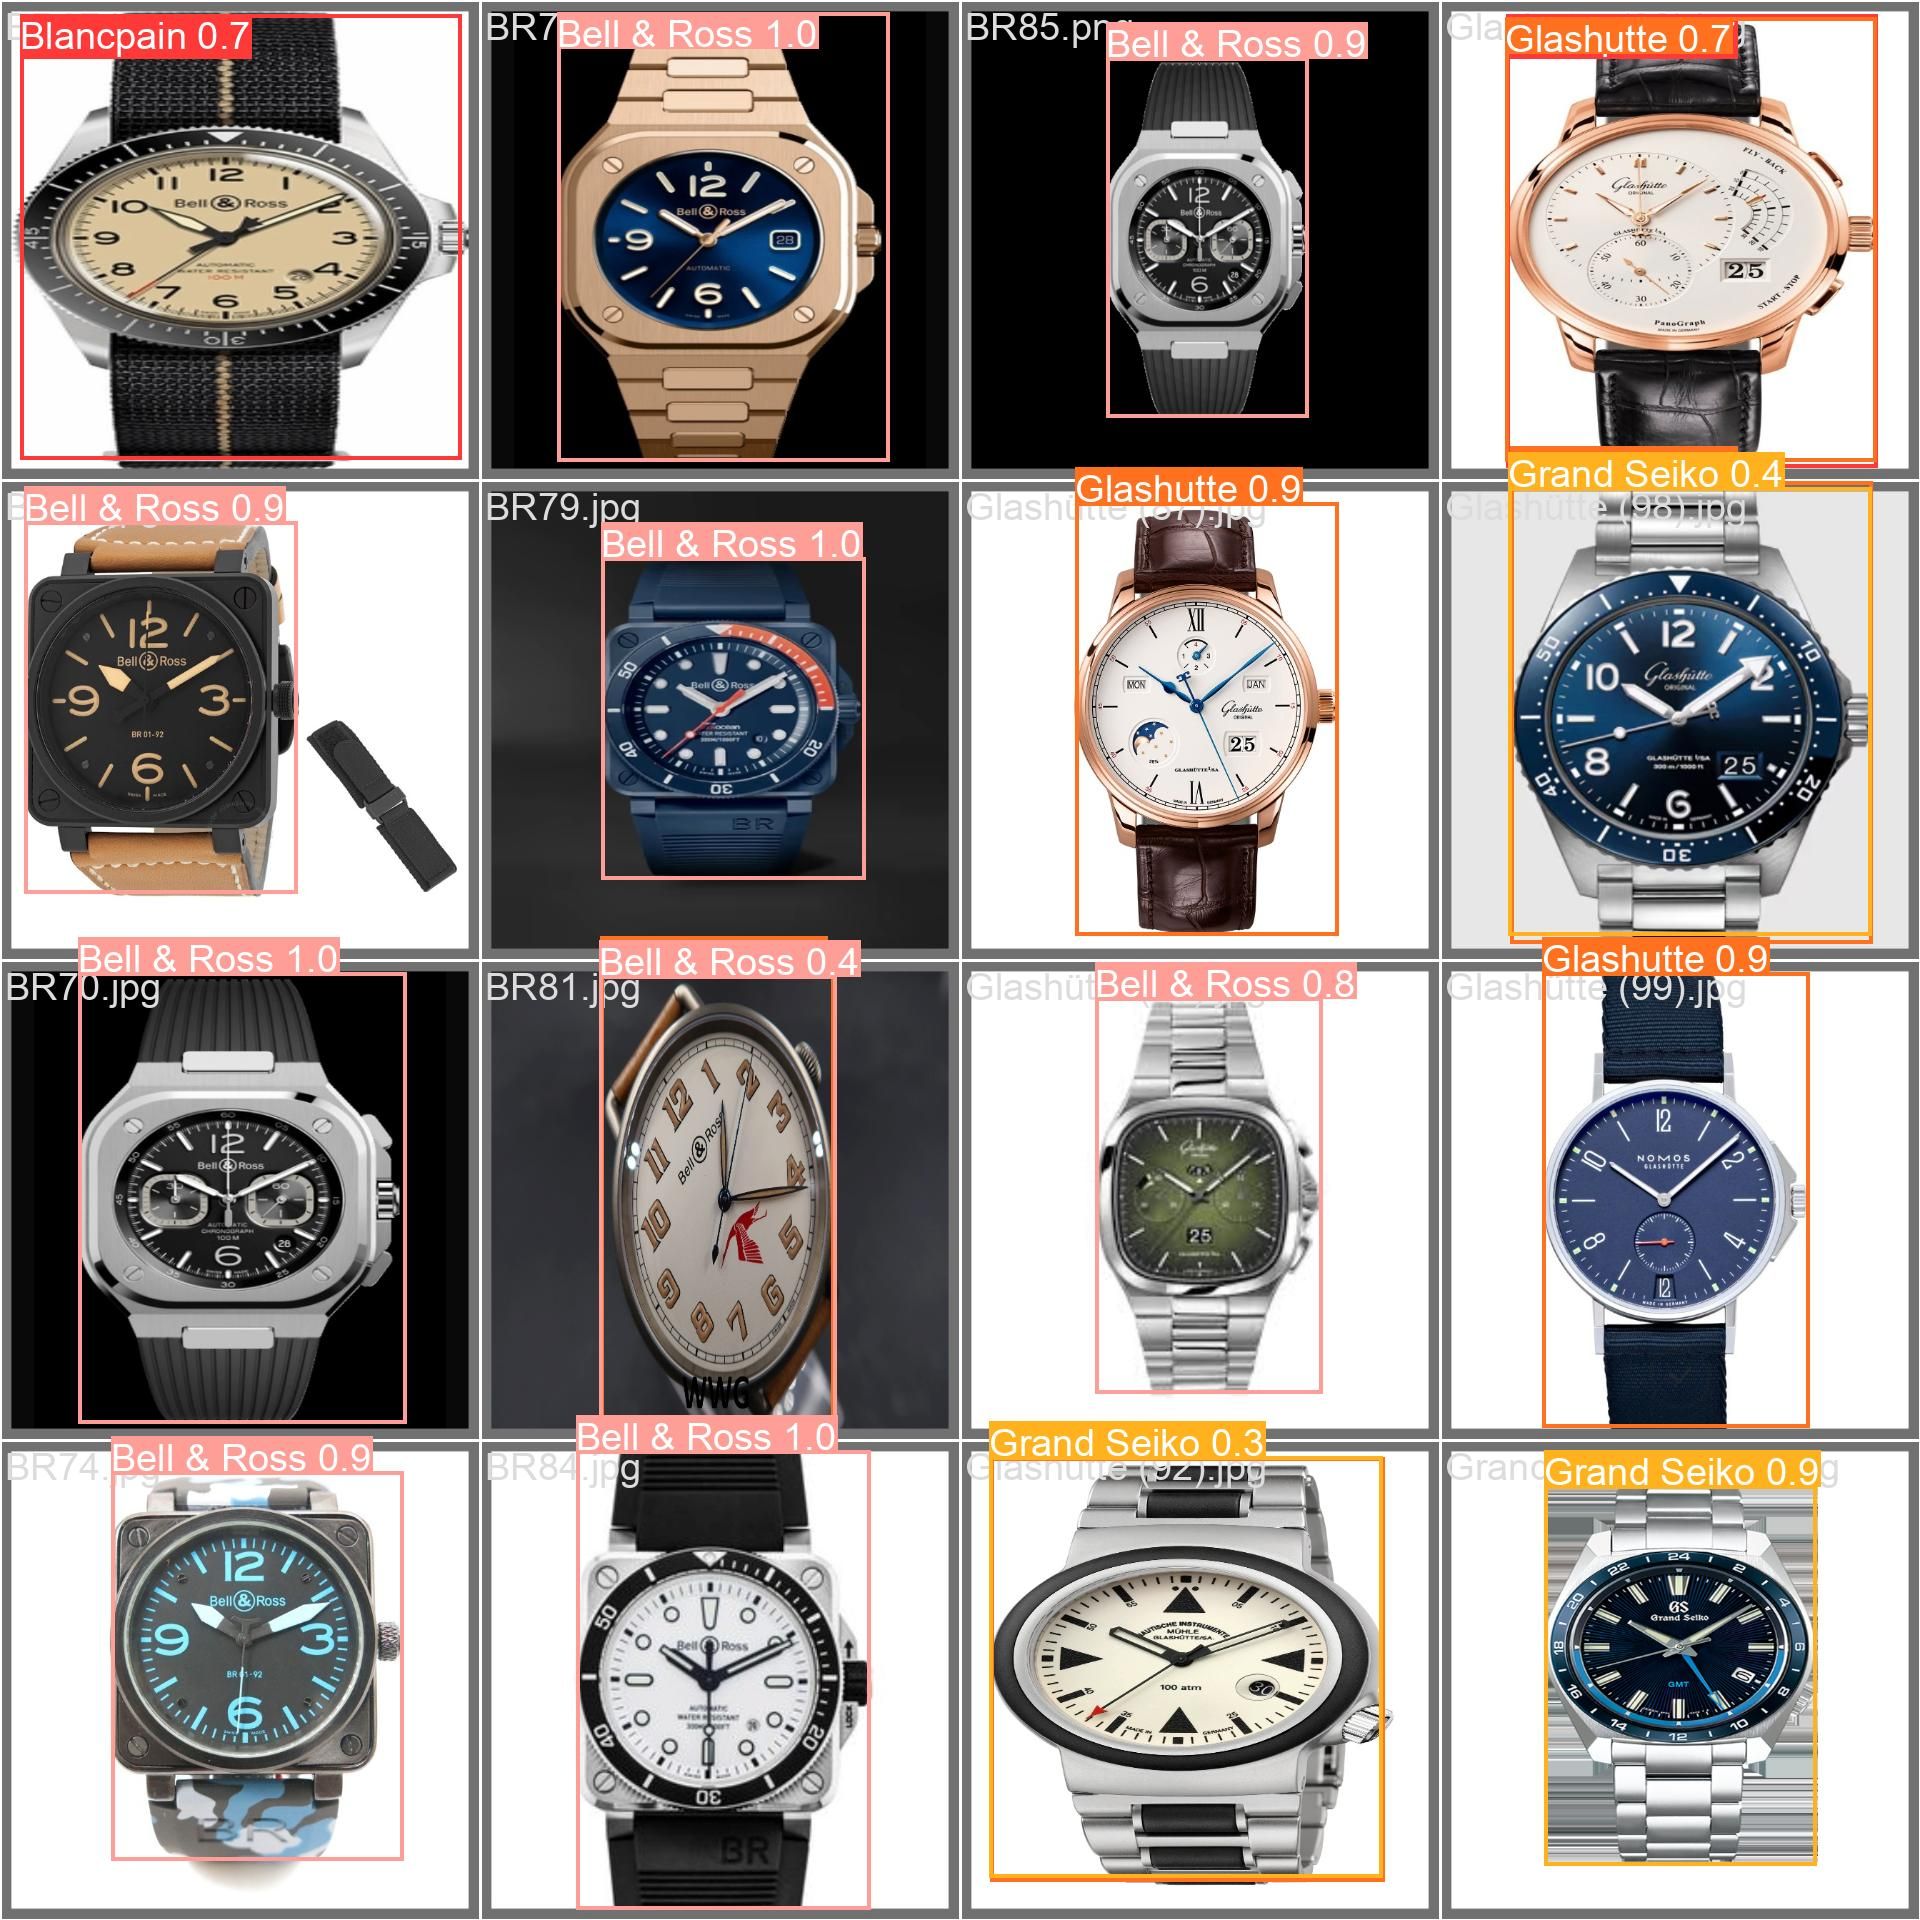

In [13]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [14]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=test/images

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/BR86.jpg: 640x640 1 Bell & Ross, 16.4ms
image 2/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/BR89.png: 640x640 1 Bell & Ross, 16.4ms
image 3/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/BR90.png: 640x640 1 Bell & Ross, 16.4ms
image 4/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/BR92.png: 640x640 1 Bell & Ross, 16.4ms
image 5/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/Glashütte (100).jpg: 640x640 1 Glashutte, 16.4ms
image 6/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/Glashütte (104).jpg: 640x640 1 Bell & Ross, 1 Glashutte, 16.4ms
image 7/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/Glashütte (105).jpg: 640x640 1 Glashutte, 16.4ms
im

In [15]:
infer = YOLO("/content/drive/MyDrive/Data_1_Uniform_Background/runs/detect/train/weights/best.pt")

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")


In [16]:
infer.predict("/content/drive/MyDrive/Data_1_Uniform_Background/test/images", save = True, save_txt = True)


image 1/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/BR86.jpg: 640x640 1 Bell & Ross, 16.4ms
image 2/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/BR89.png: 640x640 1 Bell & Ross, 16.3ms
image 3/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/BR90.png: 640x640 1 Bell & Ross, 16.3ms
image 4/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/BR92.png: 640x640 1 Bell & Ross, 16.4ms
image 5/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/Glashütte (100).jpg: 640x640 1 Blancpain, 1 Glashutte, 16.4ms
image 6/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/Glashütte (104).jpg: 640x640 1 Bell & Ross, 1 Glashutte, 16.3ms
image 7/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/Glashütte (105).jpg: 640x640 1 Grand Seiko, 16.3ms
image 8/17 /content/drive/MyDrive/Data_1_Uniform_Background/test/images/Glashütte (107).jpg: 640x640 1 Glashutte, 16.3ms
image 9/17 /content/drive/MyDrive

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Blancpain', 1: 'Bell & Ross', 2: 'Glashutte', 3: 'Grand Seiko'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
   